## Donovan test code just to get started 

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the ticker and the time period
ticker = 'AAPL'
start_date = '2019-01-01'
end_date = '2020-01-01'

# Fetch data
data = yf.download(ticker, start=start_date, end=end_date)
print(data.head())



[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  37.845047  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.075401  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.530048  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.450970  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.126774  164101200


In [11]:
# Moving Average 

short_window = 40
long_window = 100

data['Short_MAvg'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MAvg'] = data['Close'].rolling(window=long_window, min_periods=1).mean()


In [12]:
# Basic trading signal based on crossover 

# Create a 'Signal' column
data['Signal'] = 0
data['Signal'] = np.where(data['Short_MAvg'] > data['Long_MAvg'], 1, 0)

# Generate trading orders
data['Position'] = data['Signal'].diff()


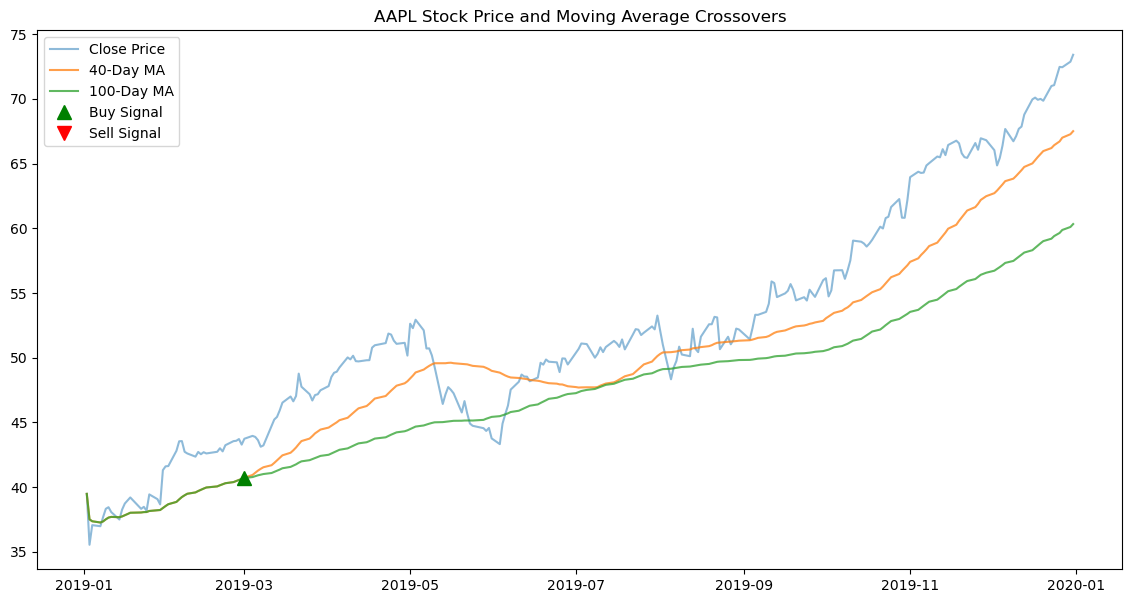

In [14]:
# Basic Back Test

# Plot the closing prices and moving averages
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['Short_MAvg'], label=f'{short_window}-Day MA', alpha=0.75)
plt.plot(data['Long_MAvg'], label=f'{long_window}-Day MA', alpha=0.75)

# Plot buy signals
plt.plot(data[data['Position'] == 1].index, data['Short_MAvg'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot sell signals
plt.plot(data[data['Position'] == -1].index, data['Short_MAvg'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('AAPL Stock Price and Moving Average Crossovers')
plt.legend()
plt.show()



Messing around with  mean reversion

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ticker = 'AAPL'
start_date = '2019-01-01'
end_date = '2020-01-01'


data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [16]:
# Calculate the moving average and the standard deviation
window = 20
data['Moving_Average'] = data['Close'].rolling(window=window).mean()
data['Std_Dev'] = data['Close'].rolling(window=window).std()

# Calculate the z-score
data['Z_Score'] = (data['Close'] - data['Moving_Average']) / data['Std_Dev']

# Define thresholds for buying and selling
threshold_buy = -1.5  # Buy signal threshold
threshold_sell = 1.5  # Sell signal threshold

# Generate signals
data['Signal'] = 0
data['Signal'][data['Z_Score'] > threshold_sell] = -1  # Sell signal
data['Signal'][data['Z_Score'] < threshold_buy] = 1  # Buy signal

# Generate trading positions
data['Position'] = data['Signal'].replace(0, np.nan).ffill().fillna(0)


/var/folders/6z/mh947m1s1m17ylsnt3y4rkfc0000gn/T/ipykernel_33078/834088593.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Z_Score'] > threshold_sell] = -1  # Sell signal
/var/folders/6z/mh947m1s1m17ylsnt3y4rkfc0000gn/T/ipykernel_33078/834088593.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Z_Score'] < threshold_buy] = 1  # Buy signal


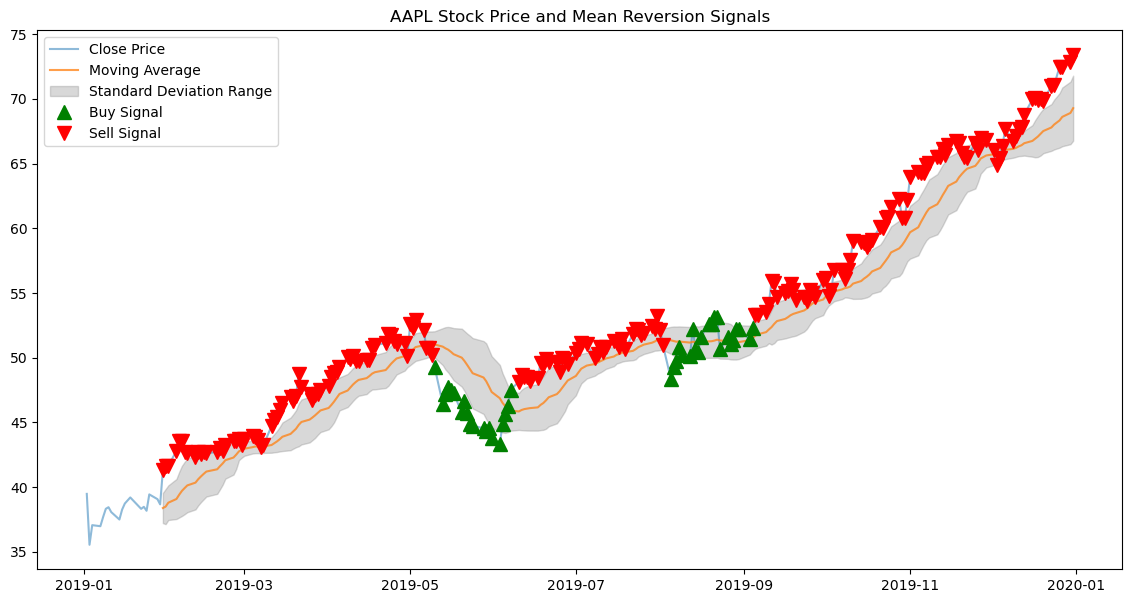

In [17]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['Moving_Average'], label='Moving Average', alpha=0.75)
plt.fill_between(data.index, data['Moving_Average'] - data['Std_Dev'], data['Moving_Average'] + data['Std_Dev'], color='gray', alpha=0.3, label='Standard Deviation Range')

# Highlight the buy and sell signals
plt.plot(data[data['Position'] == 1].index, data['Close'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data[data['Position'] == -1].index, data['Close'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('AAPL Stock Price and Mean Reversion Signals')
plt.legend()
plt.show()


Now will actually do some machine learning stuff. Add some random features and try to make it work

In [18]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Trying random forest here just for fun, could use LR or something else too


ticker = 'AAPL'
data = yf.download(ticker, start="2010-01-01", end="2020-01-01")


[*********************100%%**********************]  1 of 1 completed


In [19]:
# Calculate moving averages
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Calculate RSI
delta = data['Close'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up / ema_down

data['RSI'] = 100 - (100 / (1 + rs))

# Calculate the daily returns
data['Returns'] = data['Close'].pct_change()

# Drop any NaNs
data.dropna(inplace=True)


In [20]:
# Data if it goes up or down

data['Target'] = (data['Returns'].shift(-1) > 0).astype(int)


In [21]:
features = ['SMA_20', 'SMA_50', 'RSI', 'Returns']
X = data[features]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5080971659919028


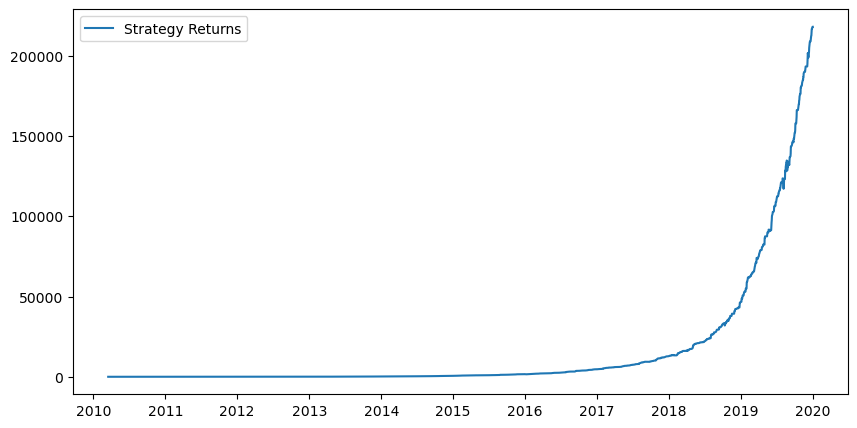

In [24]:
data['Predicted_Signal'] = model.predict(X)
data['Strategy_Returns'] = data['Returns'] * data['Predicted_Signal'].shift(1)
cumulative_strategy_returns = (data['Strategy_Returns'] + 1).cumprod()

plt.figure(figsize=(10,5))
plt.plot(cumulative_strategy_returns, label='Strategy Returns')
plt.legend()
plt.show()

# Not fully correct but good starting point. Just wanted to start familiarizing myself with the library and the data.
